<a href="https://colab.research.google.com/github/pksj/IIITA_2nd_SEM/blob/main/MIT2020024_ML_Assignment_01_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement a function run knn that runs K-NN for different values of k
∈ 1, 3, 5, 7, 9 and plots the classification rate on the validation set (number of
correctly predicted cases, divided by total number of data points) as a function
of k. Report the plot in the write-up.** 

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt


# just to get mnist dataset
from keras.datasets import mnist


Gathering dataset and splitting into training and testing

In [12]:
mnist_dataset = mnist.load_data()


x_train = mnist_dataset[0][0]
y_train = mnist_dataset[0][1]

x_test = mnist_dataset[1][0]
y_test = mnist_dataset[1][1]

#Normalization

x_train = x_train / 255
y_train = y_train / 9

x_test = x_test / 255
y_test = y_test / 9


x_train = x_train[:10000]
y_train = y_train[:10000]

x_test = x_test[:100]
y_test = y_test[:100]


Funciton to find distance between two images

In [7]:
def image_distance(image_1, image_2):

    image_shape = image_1.shape

    distance_square = 0.

    for row in range(image_shape[0]):
        for column in range(image_shape[1]):

            distance_square += (int(image_1[row][column]) - int(image_2[row][column]))**2

    return math.sqrt(distance_square)  



Function max_label

used to find lable with maximum count 

In [8]:
def max_label(labels):

    frequency = [0] * 10

    for label in labels:
        frequency[label] += 1

    max_index = 0

    for i in range(1, 10):

        if(frequency[i] > frequency[max_index]):

            max_index = i

    return max_index                


Function KNN_prediction

In [9]:
def KNN_prediction(k, x_train, y_train, test_image):

    distance_with_labels = []

    for image, label in zip(x_train, y_train):

        ans = image_distance(image, test_image) , label
        #print(ans)
        distance_with_labels.append(ans)

    distance_with_labels.sort(key=lambda x:x[0])

    # sorted_distance_with_labels = sorted(distance_with_labels, key=lambda (distance, _): distance)    sorted(distance_with_labels)
    #print(distance_with_labels)
    k_neighbors = [label for image, label in distance_with_labels[0:k]]

    return max_label(k_neighbors)



Prediction on test data

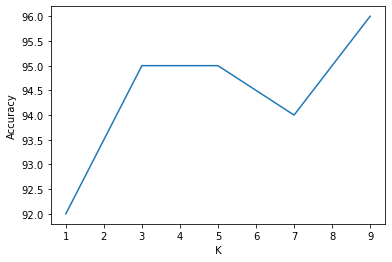

In [13]:
def run_knn():

    k_values = [1,3,5,7,9]
    accuracy_per_k = [0] * 5

    for k in k_values:
        
        correct_prediction = 0

        for image, label in zip(x_test, y_test):

            if(KNN_prediction(k, x_train, y_train, image) == label):

                correct_prediction += 1

        accuracy_per_k[ k // 2 ] = ( correct_prediction * 100 )/ len(x_test)

    plt.plot(k_values, accuracy_per_k)
    plt.xlabel(" K ")
    plt.ylabel("Accuracy")
    plt.show()    

